# Analysis of inter-residue contacts 

a03ws 

Date analysis started: 17th Feb 2023

1. contact-maps
2. gromos clustering analysis 

working in /home/alice/Data/orf6/MD/analysis/


make ndx for each residue 

# make index file of atoms grouped per residue 
#note this is for alice's N-terminal acetylation
gmx make_ndx -f ../confout.gro -o res.ndx 

splitres 1

group together ACE and SER2

10 | 11

32 Protein_ACE_1_Protein_SER_2:    17 atoms

remove individual ACE and SER2 

del 10 (x2) 


In [1]:
also doing for a03ws prot 

# make index file of atoms grouped per residue 
gmx make_ndx -f ../confout.gro -o res.ndx 

PROTEIN_MET_1 PROTEIN_PHE_2 PROTEIN_HIS_3 PROTEIN_LEU_4 PROTEIN_VAL_5 PROTEIN_ASP_6 PROTEIN_PHE_7 PROTEIN_GLN_8 PROTEIN_VAL_9 PROTEIN_THR_10 PROTEIN_ILE_11 PROTEIN_ALA_12 PROTEIN_GLU_13 PROTEIN_ILE_14 PROTEIN_LEU_15 PROTEIN_LEU_16 PROTEIN_ILE_17 PROTEIN_ILE_18 PROTEIN_MET_19 PROTEIN_ARG_20 PROTEIN_THR_21 PROTEIN_PHE_22 PROTEIN_LYS_23 PROTEIN_VAL_24 PROTEIN_SER_25 PROTEIN_ILE_26 PROTEIN_TRP_27 PROTEIN_ASN_28 PROTEIN_LEU_29 PROTEIN_ASP_30 PROTEIN_TYR_31 PROTEIN_ILE_32 PROTEIN_ILE_33 PROTEIN_ASN_34 PROTEIN_LEU_35 PROTEIN_ILE_36 PROTEIN_ILE_37 PROTEIN_LYS_38 PROTEIN_ASN_39 PROTEIN_LEU_40 PROTEIN_SER_41 PROTEIN_LYS_42 PROTEIN_SER_43 PROTEIN_LEU_44 PROTEIN_THR_45 PROTEIN_GLU_46 PROTEIN_ASN_47 PROTEIN_LYS_48 PROTEIN_TYR_49 PROTEIN_SER_50 PROTEIN_GLN_51 PROTEIN_LEU_52 PROTEIN_ASP_53 PROTEIN_GLU_54 PROTEIN_GLU_55 PROTEIN_GLN_56 PROTEIN_PRO_57 PROTEIN_MET_58 PROTEIN_GLU_59 PROTEIN_ILE_60 PROTEIN_ASP_61

SyntaxError: invalid syntax (3485337344.py, line 1)

In [ ]:
#to calculate LJ and Coul, first need to make new mdp file, then run grompp, then submit new runscript, see below.


#run this on giant concatenated trajectory.


### mdp same as 7-npt run with energy groups adjustment 

; VARIOUS PREPROCESSING OPTIONS
; Preprocessor information: use cpp syntax.
; e.g.: -I/home/joe/doe -I/home/mary/roe
include                  = 
; e.g.: -DPOSRES -DFLEXIBLE (note these variable names are case sensitive)
define                   = 
 
; RUN CONTROL PARAMETERS
integrator               = md
; Start time and timestep in ps
tinit                    = 0
dt                       = 0.003
nsteps                  = -1    
 
; For exact run continuation or redoing part of a run
init_step                = 0
; Part index is updated automatically on checkpointing (keeps files separate)
simulation_part          = 1
; mode for center of mass motion removal
comm-mode                = Linear
; number of steps for center of mass motion removal
nstcomm                  = 50
; group(s) for center of mass motion removal
comm-grps                = 
 
; OUTPUT CONTROL OPTIONS
; Output frequency for coords (x), velocities (v) and forces (f)
nstxout                  = 0
nstvout                  = 0
nstfout                  = 0
; Output frequency for energies to log file and energy file
nstlog                   = 0
nstcalcenergy            = 1
nstenergy                = 1
; Output frequency and precision for .xtc file
nstxout-compressed       = 0
compressed-x-precision   = 0
; This selects the subset of atoms for the compressed
; trajectory file. You can select multiple groups. By
; default, all atoms will be written.
compressed-x-grps        = protein
; Selection of energy groups
energygrps               = Protein_ACE_1_Protein_SER_2 Protein_LYS_3 Protein_SER_4 Protein_LEU_5 Protein_THR_6 Protein_GLU_7 Protein_ASN_8 Protein_LYS_9 Protein_TYR_10 Protein_SER_11 Protein_GLN_12 Protein_LEU_13 Protein_ASP_14 Protein_GLU_15 Protein_GLU_16 Protein_GLN_17 Protein_PRO_18 Protein_MET_19 Protein_GLU_20 Protein_ILE_21 Protein_ASP_22 
 
; NEIGHBORSEARCHING PARAMETERS
; cut-off scheme (Verlet: particle based cut-offs, group: using charge groups)
cutoff-scheme            = Verlet
; nblist update frequency
nstlist                  = 10
; ns algorithm (simple or grid)
ns_type                  = grid
; Periodic boundary conditions: xyz, no, xy
pbc                      = xyz
periodic_molecules       = no
; Allowed energy error due to the Verlet buffer in kJ/mol/ps per atom,
; a value of -1 means: use rlist
verlet-buffer-tolerance  = 0.001
; nblist cut-off        
rlist                    = 1.2
 
; OPTIONS FOR ELECTROSTATICS AND VDW
; Method for doing electrostatics
coulombtype              = pme
coulomb-modifier         = Potential-shift-Verlet
rcoulomb-switch          = 0
rcoulomb                 = 1.2
; Relative dielectric constant for the medium and the reaction field
epsilon_r                = 1
epsilon_rf               = 1
; Method for doing Van der Waals
vdw-type                 = cut-off
vdw-modifier             = Potential-shift-Verlet
; cut-off lengths       
rvdw-switch              = 0
rvdw                     = 1.2
; Apply long range dispersion corrections for Energy and Pressure
DispCorr                 = 
; Extension of the potential lookup tables beyond the cut-off
table-extension          = 1
; Separate tables between energy group pairs
energygrp-table          = 
; Spacing for the PME/PPPM FFT grid
fourierspacing           = 0.12
; FFT grid size, when a value is 0 fourierspacing will be used
fourier_nx               = 0
fourier_ny               = 0
fourier_nz               = 0
; EWALD/PME/PPPM parameters
pme_order                = 4
ewald_rtol               = 1e-05
ewald-rtol-lj            = 0.001
lj-pme-comb-rule         = Geometric
ewald_geometry           = 3d
epsilon_surface          = 0
 
; OPTIONS FOR WEAK COUPLING ALGORITHMS
; Temperature coupling  
Tcoupl                   = v-rescale
nsttcouple               = -1
nh-chain-length          = 10
print-nose-hoover-chain-variables = no
; Groups to couple separately
tc-grps                  = system
; Time constant (ps) and reference temperature (K)
tau_t                    = 0.2
ref_t                    = 310
; pressure coupling     
Pcoupl                   = parrinello-rahman
Pcoupltype               = isotropic
nstpcouple               = -1
; Time constant (ps), compressibility (1/bar) and reference P (bar)
tau_p                    = 1.0
compressibility          = 4.5e-5
ref_p                    = 1.0
; Scaling of reference coordinates, No, All or COM
refcoord_scaling         = No
 
; GENERATE VELOCITIES FOR STARTUP RUN
gen_vel                  = no
gen_temp                 = 
gen_seed                 = -1
 
; OPTIONS FOR BONDS    
constraints              = all-bonds
;constraints              = h-bonds
; Type of constraint algorithm
constraint-algorithm     = Lincs
; Do not constrain the start configuration
continuation             = no
; Use successive overrelaxation to reduce the number of shake iterations
Shake-SOR                = no
; Relative tolerance of shake
shake-tol                = 0.0001
; Highest order in the expansion of the constraint coupling matrix
lincs-order              = 6
; Number of iterations in the final step of LINCS. 1 is fine for
; normal simulations, but use 2 to conserve energy in NVE runs.
; For energy minimization with constraints it should be 4 to 8.
lincs-iter               = 2
; Lincs will write a warning to the stderr if in one step a bond
; rotates over more degrees than
lincs-warnangle          = 30
; Convert harmonic bonds to morse potentials
morse                    = no
 

## add to mdp peptide 
# note that ace group specific to alice's peptide.
energygrps  = Protein_ACE_1_Protein_SER_2 Protein_LYS_3 Protein_SER_4 Protein_LEU_5 Protein_THR_6 Protein_GLU_7 Protein_ASN_8 Protein_LYS_9 Protein_TYR_10 Protein_SER_11 Protein_GLN_12 Protein_LEU_13 Protein_ASP_14 Protein_GLU_15 Protein_GLU_16 Protein_GLN_17 Protein_PRO_18 Protein_MET_19 Protein_GLU_20 Protein_ILE_21 Protein_ASP_22 

## add to mdp protein CTR 

energygrps = Protein_MET_1 Protein_PHE_2 Protein_HIS_3 Protein_LEU_4 Protein_VAL_5 Protein_ASP_6 Protein_PHE_7 Protein_GLN_8 Protein_VAL_9 Protein_THR_10 Protein_ILE_11 Protein_ALA_12 Protein_GLU_13 Protein_ILE_14 Protein_LEU_15 Protein_LEU_16 Protein_ILE_17 Protein_ILE_18 Protein_MET_19 Protein_ARG_20 Protein_THR_21 Protein_PHE_22 Protein_LYS_23 Protein_VAL_24 Protein_SER_25 Protein_ILE_26 Protein_TRP_27 Protein_ASN_28 Protein_LEU_29 Protein_ASP_30 Protein_TYR_31 Protein_ILE_32 Protein_ILE_33 Protein_ASN_34 Protein_LEU_35 Protein_ILE_36 Protein_ILE_37 Protein_LYS_38 Protein_ASN_39 Protein_LEU_40 Protein_SER_41 Protein_LYS_42 Protein_SER_43 Protein_LEU_44 Protein_THR_45 Protein_GLU_46 Protein_ASN_47 Protein_LYS_48 Protein_TYR_49 Protein_SER_50 Protein_GLN_51 Protein_LEU_52 Protein_ASP_53 Protein_GLU_54 Protein_GLU_55 Protein_GLN_56 Protein_PRO_57 Protein_MET_58 Protein_GLU_59 Protein_ILE_60 Protein_ASP_61

In [ ]:
# need to create topol without water

# make tpr file
gmx grompp -f contacts.mdp -c ../confout.gro -o contacts.tpr -n res.ndx -p topol_noW.top -maxwarn 1


# make srun script 
srun --distribution=block:block --hint=nomultithread gmx_mpi mdrun -s contacts -rerun traj_all-skip-0-noW-whole.trr -ntomp $OMP_NUM_THREADS &> log

#upload to archer2 and submit 

rsync -hvart contacts alice98@login.archer2.ac.uk:/work/e692/e692/alice98/orf6/peptide/sims/a03ws/7-npt-metad-5fs/skip-2-workup_19_01_2023/

gmx_mpi energy -f ener.edr -noaver

LJ-SR
enter
enter

save as LJ.xvg

gmx_mpi energy -f ener.edr -noaver

Coul-SR
enter
enter

save as Coul.xvg
ls

# Download back to local desktop for analysis 

rsync -hvart alice98@login.archer2.ac.uk:/work/e692/e692/alice98/orf6/peptide/sims/a03ws/7-npt-metad-5fs/skip-2-workup_19_01_2023/contacts .

In [1]:
import numpy as np 
import os,sys
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md
import nglview as nv
import matplotlib.colors as clr
import pandas as pd
from glob import glob
from itertools import *
import math
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
import MDAnalysis as mda
from MDAnalysis import analysis 
from MDAnalysis.analysis import encore
from MDAnalysis.analysis.encore.clustering import ClusteringMethod as clm 
import networkx as nx
import moviepy.editor as mpy
from scipy.linalg import norm
from scipy.spatial.distance import euclidean 
from scipy.spatial.distance import jensenshannon
from scipy.stats import gaussian_kde
from time import sleep
from math import pi
from scipy import stats
from scipy.stats import norm
from scipy.spatial import distance

/home/alice/anaconda3/envs/mdaenv/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
#Define function to return the weighted average and standard deviation
def weighted_avg_and_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

In [3]:
#Define some presets for plotting
plt.rcParams['font.serif'] = "Arial"
plt.rcParams['font.family'] = "serif"
plt.rcParams.update({'font.size': 18,'font.weight': 'bold'})

# define figure size 
fig = plt.figure(figsize=(8, 4))

#Define colors 

## a03ws
c_a03ws = (1,0.6471,0)   #set color for ORF6 points (divide rgb by 255) orange1	#FFA500	RGB(255,165,0)
d_a03ws = (0.8,0.518,0) # set colour for top of colour bar (divide rgb by 255) --> #CC8400(204,132,0)
e_a03ws = (0.6,0.39,0) # set colour for top of colour bar (divide rgb by 255) --> #996300 (153,99,0)
f_a03ws = (0.5,0.35,0.0039) # set colour for top of colour bar (divide rgb by 255) --> #4c3100 (138, 89, 1)

##a99sb
c_a99sb = (0.6980,0.2275,0.9333)   #set color for ORF6 points (divide rgb by 255) darkorchid2	#B23AEE	RGB(178,58,238)
d_a99sb = (0.553,0.067,0.792)   #set color for ORF6 points (divide rgb by 255) --> #8D11CA	(141, 17, 202)
e_a99sb = (0.35,0.04,0.5)   #set color for ORF6 points (divide rgb by 255) --> #590b80 rgb(89,11,128)
f_a99sb = (0.10,0.01,0.15)   #set color for ORF6 points (divide rgb by 255) --> #1a0326 rgb(26,3,38)

##c36m
b_c36m = (0,0.8,0.8)   #set color for ORF6 points (divide rgb by 255) teal	#003434	RGB(#00cdcd rgb(0,205,205))
c_c36m = (0,0.502,0.502)   #set color for ORF6 points (divide rgb by 255) teal	#008080	RGB(0,128,128)
d_c36m = (0,0.3,0.3)   #set color for ORF6 points (divide rgb by 255) teal	#004d4drgb(0,77,77)
e_c36m = (0,0.204,0.204)   #set color for ORF6 points (divide rgb by 255) teal	#003434	RGB(0,52,52)

#Experimental is grey
exp = (0.2,0.21,0.22) #grey (128,128,128)

#Define a colormaps

ORF6_seq = 'MFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQLDEEQPMEID'

ORF6_CTR_seq = 'SKSLTENKYSQLDEEQPMEID'

cmap_a03ws_con  = clr.LinearSegmentedColormap.from_list('name', [c_a03ws, 'w','grey'], N=256, gamma=1.0)
cmap_a03ws_cs_con  = clr.LinearSegmentedColormap.from_list('name', [d_a03ws, 'w','grey'], N=256, gamma=1.0)
cmap_a03ws_prot_con  = clr.LinearSegmentedColormap.from_list('name', [f_a03ws, 'w','grey'], N=256, gamma=1.0)
cmap_a99sb_con  = clr.LinearSegmentedColormap.from_list('name', [c_a99sb, 'w'], N=256, gamma=1.0)
cmap_c36m_con  = clr.LinearSegmentedColormap.from_list('name', [c_c36m, 'w'], N=256, gamma=1.0)

cmap_a03ws_circ  = clr.LinearSegmentedColormap.from_list('name', [c_a03ws,'w'], N=256, gamma=1.0)
cmap_a03ws_cs_circ  = clr.LinearSegmentedColormap.from_list('name', [d_a03ws, 'w'], N=256, gamma=1.0)


<Figure size 800x400 with 0 Axes>

In [4]:
cd /home/alice/Data/orf6/MD/analysis/

/mnt/raid1/Alice/orf6/MD/analysis


Examine whether inter-residue contacts. This analysis is based on Lennard Jones (LJ) and Coulomb (Coul) interaction energies between residues calculated using the GROMACS gmx energy tool. Only short-range interaction energies were considered within a 1.2 nm cut-off. LJ contacts will also be used as input for the GROMOS (4) clustering analysis.

Any differences with and without CS restraints 

Reference
(4) X. Daura et al., Peptide folding: when simulation meets experiment. Angew. Chem. Int. 38, 236-240 (1999).

Taken from Gabi's script 

https://github.com/gthh2/amyloid-beta_small_mol/blob/master/Metadynamic_metainference/Analysis/Metadynamic_metainference_analysis.ipynb

In [5]:
#load weights
w_a03ws = np.loadtxt('/home/alice/Data/orf6/MD/analysis/a03ws/weights_corr.dat')
w_a03ws_cs = np.loadtxt('/home/alice/Data/orf6/MD/analysis/a03ws_cs/weights_corr.dat')
w_a03ws_prot = np.loadtxt('/home/alice/Data/orf6/MD/analysis/a03ws_prot/weights_corr.dat')

In [6]:
#Normalise metadynamics weights a03ws

w_a03ws /= w_a03ws.sum()
print(sum(w_a03ws))

0.9999999999999913


In [7]:
#Normalise metadynamics weights a03ws with CS restraints 

w_a03ws_cs /= w_a03ws_cs.sum()
print(sum(w_a03ws_cs))

0.9999999999999797


In [8]:
#Normalise metadynamiprot weights a03ws with prot restraints 

w_a03ws_prot /= w_a03ws_prot.sum()
print(sum(w_a03ws_prot))

0.9999999999999963


In [9]:
#Now get kish for each of the trajectories w_a03ws and w_a03ws_cs, w_c36m_prot 
kish_a03ws = ((w_a03ws.sum())*(w_a03ws.sum()))/((w_a03ws*w_a03ws).sum())
kish_a03ws_cs = ((w_a03ws_cs.sum())*(w_a03ws_cs.sum()))/((w_a03ws_cs*w_a03ws_cs).sum())
kish_a03ws_prot = ((w_a03ws_prot.sum())*(w_a03ws_prot.sum()))/((w_a03ws_prot*w_a03ws_prot).sum())
print('Kish for a03ws', kish_a03ws)
print('Kish for a03ws with cs', kish_a03ws_cs)
print('Kish for a03ws prot', kish_a03ws_prot)

Kish for a03ws 42080.88710622398
Kish for a03ws with cs 47447.14073406258
Kish for a03ws prot 30049.473930051674


In [10]:
## Select top frames - 40,000 - based on number of states needed to represent ensemble 
#a03ws

top_frames_a03ws = np.random.choice(w_a03ws.shape[0], 40000, p = w_a03ws, replace=False) #select frames from the trajectory. do not use duplicates
top_frames_a03ws.sort(axis = 0) #sort the array in place
#np.save('a03ws/contacts/top_frames_a03ws', top_frames_a03ws) #save the chosen frames

In [11]:
## Select top frames - 40,000 - based on number of states needed to represent ensemble 
#a03ws with CS restraints 

top_frames_a03ws_cs = np.random.choice(w_a03ws_cs.shape[0], 40000, p = w_a03ws_cs, replace=False) #select frames from the trajectory. do not use duplicates
top_frames_a03ws_cs.sort(axis = 0) #sort the array in place
#np.save('a03ws_cs/contacts/top_frames_a03ws_cs', top_frames_a03ws_cs) #save the chosen frames

In [12]:
## Select top frames - 40,000 - based on number of states needed to represent ensemble 
#a03ws with prot restraints 

top_frames_a03ws_prot = np.random.choice(w_a03ws_prot.shape[0], 40000, p = w_a03ws_prot, replace=False) #select frames from the trajectory. do not use duplicates
top_frames_a03ws_prot.sort(axis = 0) #sort the array in place
#np.save('a03ws_prot/contacts/top_frames_a03ws_prot', top_frames_a03ws_prot) #save the chosen frames

In [13]:
#Load in data from GROMACS 'gmx energy' for a03ws
Coul_a03ws = np.loadtxt('a03ws/contacts/Coul-SR.xvg', comments=('#', '@'))
LJ_a03ws   = np.loadtxt('a03ws/contacts/LJ-SR.xvg', comments=('#', '@'))

In [14]:
#Load in data from GROMACS 'gmx energy' for a03ws_cs
Coul_a03ws_cs = np.loadtxt('a03ws_cs/contacts/Coul-SR.xvg', comments=('#', '@'))
LJ_a03ws_cs   = np.loadtxt('a03ws_cs/contacts/LJ-SR.xvg', comments=('#', '@'))

In [16]:
#Load in data from GROMACS 'gmx energy' for a03ws_prot
Coul_a03ws_prot = np.loadtxt('a03ws_prot/contacts/Coul-SR.xvg', comments=('#', '@'))
LJ_a03ws_prot   = np.loadtxt('a03ws_prot/contacts/LJ-SR.xvg', comments=('#', '@'))

peptide has 21 residues 
from triangular matrix - res0, needs to see all 20, and 21 and the diagonal (+21)
(21*20/2)+21 = 231
to index 1:232


protein has 61 residues 
from triangular matrix - res0, needs to see all 60, and 61 and the diagonal (+61)
(61*60/2)+61 = 1891.0
to index 1:1892


In [15]:
# WITHOUT CS RESTRAINTS 

#Triangulate the LJ for a03ws alone for each frame:
tri_LJ_a03ws = np.empty((len(LJ_a03ws), 21, 21))
for i in range(0, len(LJ_a03ws)):
    data = LJ_a03ws[i, 1:232]
    out = np.zeros((21, 21))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_LJ_a03ws[i] = out
    
#Save matrix    
#np.save('a03ws/contacts/LJ_a03ws_matrix', tri_LJ_a03ws) #commented out as file is very large

#Account for weights
tri_LJ_w_a03ws = tri_LJ_a03ws * np.reshape(w_a03ws.copy(), ((len(w_a03ws)), 1, 1)) 

#Triangulate the Coul for a03ws alone for each frame:
tri_Coul_a03ws = np.empty((len(Coul_a03ws), 21, 21))
for i in range(0, len(Coul_a03ws)):
    data = Coul_a03ws[i, 1:232]
    out = np.zeros((21, 21))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_Coul_a03ws[i] = out

#Save matrix    
#np.save('a03ws/contacts/Coul_a03ws_matrix', tri_Coul_a03ws) #commented out as file is very large

#Account for weights
tri_Coul_w_a03ws = tri_Coul_a03ws * np.reshape(w_a03ws.copy(), ((len(w_a03ws)), 1, 1)) 

In [16]:
# WITH CS RESTRAINTS 

#Triangulate the LJ for a03ws_cs alone for each frame:
tri_LJ_a03ws_cs = np.empty((len(LJ_a03ws_cs), 21, 21))
for i in range(0, len(LJ_a03ws_cs)):
    data = LJ_a03ws_cs[i, 1:232]
    out = np.zeros((21, 21))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_LJ_a03ws_cs[i] = out
    
#Save matrix    
#np.save('a03ws_cs/contacts/LJ_a03ws_cs_matrix', tri_LJ_a03ws_cs) #commented out as file is very large

#Account for weights
tri_LJ_w_a03ws_cs = tri_LJ_a03ws_cs * np.reshape(w_a03ws_cs.copy(), ((len(w_a03ws_cs)), 1, 1)) 

#Triangulate the Coul for a03ws_cs alone for each frame:
tri_Coul_a03ws_cs = np.empty((len(Coul_a03ws_cs), 21, 21))
for i in range(0, len(Coul_a03ws_cs)):
    data = Coul_a03ws_cs[i, 1:232]
    out = np.zeros((21, 21))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_Coul_a03ws_cs[i] = out

#Save matrix    
#np.save('a03ws_cs/contacts/Coul_a03ws_cs_matrix', tri_Coul_a03ws_cs) #commented out as file is very large

#Account for weights
tri_Coul_w_a03ws_cs = tri_Coul_a03ws_cs * np.reshape(w_a03ws_cs.copy(), ((len(w_a03ws_cs)), 1, 1)) 

In [19]:
# 61 res protein 

#Triangulate the LJ for a03ws_prot alone for each frame:
tri_LJ_a03ws_prot = np.empty((len(LJ_a03ws_prot), 61, 61))
for i in range(0, len(LJ_a03ws_prot)):
    data = LJ_a03ws_prot[i, 1:1892]
    out = np.zeros((61, 61))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_LJ_a03ws_prot[i] = out
    
#Save matrix    
#np.save('a03ws_prot/contacts/LJ_a03ws_prot_matrix', tri_LJ_a03ws_prot) #commented out as file is very large

#Account for weights
tri_LJ_w_a03ws_prot = tri_LJ_a03ws_prot * np.reshape(w_a03ws_prot.copy(), ((len(w_a03ws_prot)), 1, 1)) 

#Triangulate the Coul for a03ws_prot alone for each frame:
tri_Coul_a03ws_prot = np.empty((len(Coul_a03ws_prot), 61, 61))
for i in range(0, len(Coul_a03ws_prot)):
    data = Coul_a03ws_prot[i, 1:1892]
    out = np.zeros((61, 61))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_Coul_a03ws_prot[i] = out

#Save matrix    
#np.save('a03ws_prot/contacts/Coul_a03ws_prot_matrix', tri_Coul_a03ws_prot) #commented out as file is very large

#Account for weights
tri_Coul_w_a03ws_prot = tri_Coul_a03ws_prot * np.reshape(w_a03ws_prot.copy(), ((len(w_a03ws_prot)), 1, 1)) 

In [17]:
#Make versions of of LJ_a03ws, LJ_a03ws_cs, Coul_a03ws, and Coul_a03ws_cs based on top frames
LJ_a03ws_cut = LJ_a03ws[top_frames_a03ws][:, 1:232]
Coul_a03ws_cut = Coul_a03ws[top_frames_a03ws][:, 1:232]

LJ_a03ws_cs_cut = LJ_a03ws_cs[top_frames_a03ws_cs][:, 1:232]
Coul_a03ws_cs_cut = Coul_a03ws_cs[top_frames_a03ws_cs][:, 1:232]

In [21]:
LJ_a03ws_prot_cut = LJ_a03ws_prot[top_frames_a03ws_prot][:, 1:1892]
Coul_a03ws_prot_cut = Coul_a03ws_prot[top_frames_a03ws_prot][:, 1:1892]

To convert these interaction energies into a contact map, interactions which were less than one standard deviation from the mean were assigned a value of -1, those within one standard deviation of the mean were assigned a value of 0, and those greater than one standard deviation of the mean were assigned a value of 1.

In [18]:
#Convert LJ_a03ws_cut into 1, 0, -1
mean = LJ_a03ws_cut.mean()
std  = LJ_a03ws_cut.std()
LJ_a03ws_cut_ones = np.zeros_like(LJ_a03ws_cut)
LJ_a03ws_cut_ones[LJ_a03ws_cut > (mean + std)] = 1
LJ_a03ws_cut_ones[LJ_a03ws_cut < (mean - std)] = -1

#Triangulate array for LJ_a03ws:
tri_LJ_a03ws_cut_ones = np.empty((len(LJ_a03ws_cut), 21, 21))
for i in range(0, len(LJ_a03ws_cut_ones)):
    data = LJ_a03ws_cut_ones[i]
    out = np.zeros((21, 21))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_LJ_a03ws_cut_ones[i] = out
            
#Convert LJ_a03ws_cs_cut into 1, 0, -1
mean = LJ_a03ws_cs_cut.mean()
std  = LJ_a03ws_cs_cut.std()
LJ_a03ws_cs_cut_ones = np.zeros_like(LJ_a03ws_cs_cut)
LJ_a03ws_cs_cut_ones[LJ_a03ws_cs_cut > (mean + std)] = 1
LJ_a03ws_cs_cut_ones[LJ_a03ws_cs_cut < (mean - std)] = -1
            
#Triangulate array for LJ_a03ws_cs:
tri_LJ_a03ws_cs_cut_ones = np.empty((len(LJ_a03ws_cs_cut), 21, 21))
for i in range(0, len(LJ_a03ws_cs_cut_ones)):
    data = LJ_a03ws_cs_cut_ones[i]
    out = np.zeros((21, 21))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_LJ_a03ws_cs_cut_ones[i] = out
    
#Convert Coul_a03ws_cut into 1, 0, -1
mean = Coul_a03ws_cut.mean()
std  = Coul_a03ws_cut.std()
Coul_a03ws_cut_ones = np.zeros_like(Coul_a03ws_cut)
Coul_a03ws_cut_ones[Coul_a03ws_cut > (mean + std)] = 1
Coul_a03ws_cut_ones[Coul_a03ws_cut < (mean - std)] = -1
            
#Triangulate array for Coul_a03ws:
tri_Coul_a03ws_cut_ones = np.empty((len(Coul_a03ws_cut), 21, 21))
for i in range(0, len(Coul_a03ws_cut_ones)):
    data = Coul_a03ws_cut_ones[i]
    out = np.zeros((21, 21))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_Coul_a03ws_cut_ones[i] = out
    
#Convert Coul_a03ws_cs_cut into 1, 0, -1
mean = Coul_a03ws_cs_cut.mean()
std  = Coul_a03ws_cs_cut.std()
Coul_a03ws_cs_cut_ones = np.zeros_like(Coul_a03ws_cs_cut)
Coul_a03ws_cs_cut_ones[Coul_a03ws_cs_cut > (mean + std)] = 1
Coul_a03ws_cs_cut_ones[Coul_a03ws_cs_cut < (mean - std)] = -1
            
#Triangulate array for Coul_a03ws_cs:
tri_Coul_a03ws_cs_cut_ones = np.empty((len(Coul_a03ws_cs_cut), 21, 21))
for i in range(0, len(Coul_a03ws_cs_cut_ones)):
    data = Coul_a03ws_cs_cut_ones[i]
    out = np.zeros((21, 21))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_Coul_a03ws_cs_cut_ones[i] = out
    

In [23]:
### PROTEIN 

#Convert LJ_a03ws_prot_cut into 1, 0, -1
mean = LJ_a03ws_prot_cut.mean()
std  = LJ_a03ws_prot_cut.std()
LJ_a03ws_prot_cut_ones = np.zeros_like(LJ_a03ws_prot_cut)
LJ_a03ws_prot_cut_ones[LJ_a03ws_prot_cut > (mean + std)] = 1
LJ_a03ws_prot_cut_ones[LJ_a03ws_prot_cut < (mean - std)] = -1

#Triangulate array for LJ_a03ws_prot:
tri_LJ_a03ws_prot_cut_ones = np.empty((len(LJ_a03ws_prot_cut), 61, 61))
for i in range(0, len(LJ_a03ws_prot_cut_ones)):
    data = LJ_a03ws_prot_cut_ones[i]
    out = np.zeros((61, 61))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_LJ_a03ws_prot_cut_ones[i] = out

#Convert Coul_a03ws_prot_cut into 1, 0, -1
mean = Coul_a03ws_prot_cut.mean()
std  = Coul_a03ws_prot_cut.std()
Coul_a03ws_prot_cut_ones = np.zeros_like(Coul_a03ws_prot_cut)
Coul_a03ws_prot_cut_ones[Coul_a03ws_prot_cut > (mean + std)] = 1
Coul_a03ws_prot_cut_ones[Coul_a03ws_prot_cut < (mean - std)] = -1
            
#Triangulate array for Coul_a03ws_prot:
tri_Coul_a03ws_prot_cut_ones = np.empty((len(Coul_a03ws_prot_cut), 61, 61))
for i in range(0, len(Coul_a03ws_prot_cut_ones)):
    data = Coul_a03ws_prot_cut_ones[i]
    out = np.zeros((61, 61))
    inds = np.triu_indices(len(out))
    out[inds] = data
    tri_Coul_a03ws_prot_cut_ones[i] = out

In [1]:
# 0 to 0.4 make all white
# set cutoff to 0.2 to get more subtleties
# grey is unfavourable - repulsion 

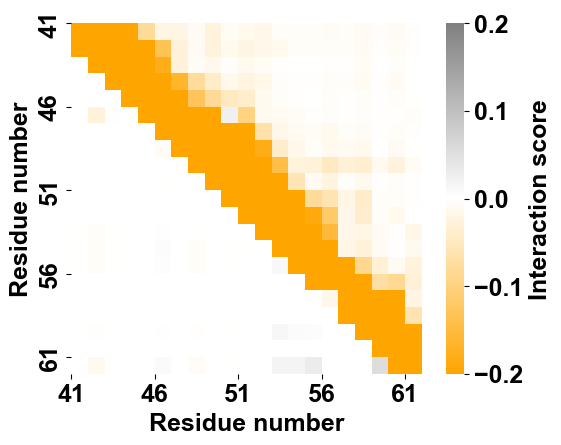

In [19]:
#Plot a03ws alone contacts based on LJ and Coul contacts
#Note the residues in the plot are indexed from zero
#The code below puts the Coul contacts into the bottom left half of the plot
invert_a03ws = tri_Coul_a03ws_cut_ones.mean(axis=0)
tri_Coul_a03ws_cut_ones_bottom = invert_a03ws.T

#Combine both LJ and Coul into a single plot           
combo_a03ws = tri_LJ_a03ws_cut_ones.mean(axis=0)+tri_Coul_a03ws_cut_ones_bottom
np.fill_diagonal(combo_a03ws, -1)
ax = sns.heatmap(combo_a03ws, vmin=-0.2, vmax=0.2, cmap=cmap_a03ws_con, center=0, cbar=True, square=True)

ax.set_xticks(np.arange(0, 21, 5))
ax.set_yticks(np.arange(0, 21, 5))
ax.set_xticklabels((41, 46, 51, 56, 61), rotation='horizontal')
ax.set_yticklabels((41, 46, 51, 56, 61))

plt.subplots_adjust(bottom=0.15)

# Add label to colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Interaction score', fontweight='bold')

ax.set_xlabel("Residue number", fontweight='bold')
ax.set_ylabel("Residue number", fontweight='bold');
#plt.savefig('/home/alice/Data/orf6/MD/MD_figures/2023/contact_maps/a03ws.pdf', format='pdf', dpi=1000, transparent=True)

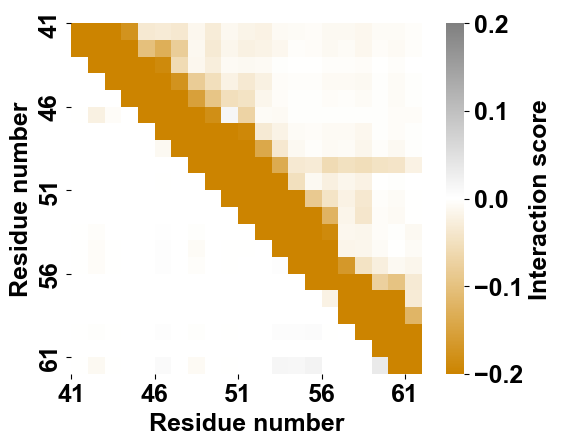

In [20]:
#Plot a03ws_cs alone contacts based on LJ and Coul contacts
#Note the residues in the plot are indexed from zero
#The code below puts the Coul contacts into the bottom left half of the plot
invert_a03ws_cs = tri_Coul_a03ws_cs_cut_ones.mean(axis=0)
tri_Coul_a03ws_cs_cut_ones_bottom = invert_a03ws_cs.T

#Combine both LJ and Coul into a single plot           
combo_a03ws_cs = tri_LJ_a03ws_cs_cut_ones.mean(axis=0)+tri_Coul_a03ws_cs_cut_ones_bottom
np.fill_diagonal(combo_a03ws_cs, -1)
ax = sns.heatmap(combo_a03ws_cs, vmin=-0.2, vmax=0.2, cmap=cmap_a03ws_cs_con, center=0, cbar=True, square=True)

ax.set_xticks(np.arange(0, 21, 5))
ax.set_yticks(np.arange(0, 21, 5))
ax.set_xticklabels((41, 46, 51, 56, 61), rotation='horizontal')
ax.set_yticklabels((41, 46, 51, 56, 61))

plt.subplots_adjust(bottom=0.15)

# Add label to colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Interaction score', fontweight='bold')

ax.set_xlabel("Residue number", fontweight='bold')
ax.set_ylabel("Residue number", fontweight='bold');
#plt.savefig('/home/alice/Data/orf6/MD/MD_figures/2023/contact_maps/a03ws_cs.pdf', format='pdf', dpi=1000, transparent=True)

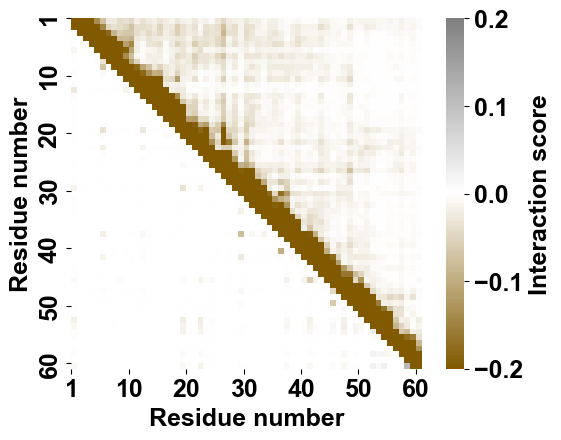

In [76]:
#Plot a03ws_prot alone contacts based on LJ and Coul contacts
#Note the residues in the plot are indexed from zero
#The code below puts the Coul contacts into the bottom left half of the plot
invert_a03ws_prot = tri_Coul_a03ws_prot_cut_ones.mean(axis=0)
tri_Coul_a03ws_prot_cut_ones_bottom = invert_a03ws_prot.T

#Combine both LJ and Coul into a single plot           
combo_a03ws_prot = tri_LJ_a03ws_prot_cut_ones.mean(axis=0)+tri_Coul_a03ws_prot_cut_ones_bottom
np.fill_diagonal(combo_a03ws_prot, -1)
ax = sns.heatmap(combo_a03ws_prot, vmin=-0.2, vmax=0.2, cmap=cmap_a03ws_prot_con, center=0, cbar=True, square=True)

ax.set_xticks(np.arange(0, 61, 10))
ax.set_yticks(np.arange(0, 61, 10))
#ax.set_xticklabels((0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60), rotation='horizontal')
#ax.set_yticklabels((0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60))
ax.set_xticklabels((1, 10, 20, 30, 40, 50, 60), rotation='horizontal')
ax.set_yticklabels((1, 10, 20, 30, 40, 50, 60))
#ax.set_xlim(40,61)
#ax.set_ylim(61,40)

# Add label to colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Interaction score', fontweight='bold')


plt.subplots_adjust(bottom=0.15)

ax.set_xlabel("Residue number", fontweight='bold')
ax.set_ylabel("Residue number", fontweight='bold');
plt.savefig('/home/alice/Data/orf6/MD/MD_figures/2023/contact_maps/a03ws_prot.pdf', format='pdf', dpi=1000, transparent=True)

## Gromos clustering analysis 


Using the LJ matrices from the top_frames obtained above, we can prepare input for GROMOS (4) clustering.

In [51]:
## Combined with and without CS restraints for a03ws clustering 

In [151]:
#Concatenate subset of LJ frames for a03ws and a03ws with CS restraints 
LJall_a03ws_a03ws_cs_cut = np.concatenate((LJ_a03ws_cut, LJ_a03ws_cs_cut))

#Pair each frame with its index using enumerate. Shuffle, and save indices/
#To repeat this random shuffle yourself, uncomment out the relevant lines below. Note that results may vary.

#l = LJall_a03ws_a03ws_cs_cut
#x = list(enumerate(l))
#np.random.shuffle(x)
#indices, l=zip(*x)
#np.save('a03ws/gromos_clustering/matrix/LJ_shuffled_a03ws_a03ws_cs', l) # saving in a03ws but for a03ws and a03ws_cs
#np.save('a03ws/gromos_clustering/matrix/indices', indices) # saving in a03ws but for a03ws and a03ws_cs

#Load indices 
indices = np.load('a03ws/gromos_clustering_LJ/matrix/indices.npy')
LJ_shuffled_a03ws_a03ws_cs = np.load('a03ws/gromos_clustering_LJ/matrix/LJ_shuffled_a03ws_a03ws_cs.npy') #not included due to file size.

Using the Coul matrices from the top_frames obtained above, we can prepare input for GROMOS (4) clustering.

In [21]:
#Concatenate subset of Coul frames for a03ws and a03ws with CS restraints 
Coulall_a03ws_a03ws_cs_cut = np.concatenate((Coul_a03ws_cut, Coul_a03ws_cs_cut))

#Pair each frame with its index using enumerate. Shuffle, and save indices/
#To repeat this random shuffle yourself, uncomment out the relevant lines below. Note that results may vary.

l = Coulall_a03ws_a03ws_cs_cut
x = list(enumerate(l))
np.random.shuffle(x)
indices, l=zip(*x)
np.save('a03ws/gromos_clustering_Coul/matrix/Coul_shuffled_a03ws_a03ws_cs', l) # saving in a03ws but for a03ws and a03ws_cs
np.save('a03ws/gromos_clustering_Coul/matrix/indices', indices) # saving in a03ws but for a03ws and a03ws_cs

#Load indices 
indices = np.load('a03ws/gromos_clustering_Coul/matrix/indices.npy')
Coul_shuffled_a03ws_a03ws_cs = np.load('a03ws/gromos_clustering_Coul/matrix/Coul_shuffled_a03ws_a03ws_cs.npy') #not included due to file size.

In [23]:
len(Coulall_a03ws_a03ws_cs_cut)

80000

The GROMOS clustering analysis is performed in two steps: matrix calculation and GROMOS clustering. Perform on HPC - i did on archer2

First, we calculate a matrix which containg the root-mean-square deviation (RMSD) between each frame and every other frame using /gromos_clustering/matrix/traj_con_mindist.py. The sample script /gromos_clustering/matrix/go.pbs illustrates how to run this script as an array job.

run on local desktop

python traj_con_mindist.py LJ_shuffled_a03ws_a03ws_cs.npy RMSD (not sure if this is correct)

gave this as number of frames --> 
# (num_frames-1)*(num_frames-2)/2
# n entries in submission script 
(80000-1)*(80000-2)/2
k0 = 0 first frame
k1 = 3199880001.0

started 5PM on the 23rd Feb finished at 3AM 24th Feb 


In [1]:
(80000-1)*(80000-2)/2

3199880001.0

Then, we perform the GROMOS clustering using the /gromos_clustering/gromos/gromos_clustering.cpp (executed with /gromos_clustering/gromos/CUT_7/go.pbs, with a cut-off value of 7 kJ/mol)

too small cutoff - errors overlap - too small
too big - all in same cluster 
going for somewhere in the middle based on gabi's observations 

input to terminal

moving to home hardrive 
working in /home/alice

../gromos_clustering.x ../../matrix/RMSD 1 3.0 80000 #1 input RMSD file, 3 cutoff, 80000 frames

# trying 1,1.5,2,3,4,4.5,5

../../../../../../../../../../home/alice/gromos_clustering_alice_test/gromos/gromos_clustering.x ../../matrix/RMSD 1 5.0 80000

crashed on dekstop
try on archer2 


In [6]:
(26281/80000)*100

32.85125

In [9]:
pwd

'/mnt/raid1/Alice/orf6/MD/analysis'

In [72]:
#Import list of clusters for trajectory 
traj = pd.read_csv('a03ws/gromos_clustering_LJ/gromos/CUT_2/trajectory.dat', delim_whitespace=True, header=None)
traj = traj[1].values
#n = 2815 #number of clusters in log.dat file (remember 0) 2.5 
n = 15787 #2

#First, get the values calculated over the entire analysed trajectories 
traj_sort_cut = traj[indices.argsort()]
    

In [92]:
cluster_pop_a03ws_cs_cut[0:10]

array([[0.333   ],
       [0.051025],
       [0.0111  ],
       [0.00315 ],
       [0.004925],
       [0.002825],
       [0.005475],
       [0.004425],
       [0.003425],
       [0.002825]])

In [95]:
sum(cluster_pop_a03ws_cs_cut)

array([1.])

In [94]:
cluster_pop_a03ws_cut[0:10]

array([[0.324025],
       [0.04625 ],
       [0.0372  ],
       [0.0182  ],
       [0.009525],
       [0.008575],
       [0.004225],
       [0.00475 ],
       [0.005225],
       [0.00555 ]])

In [138]:
#Calculate populations and logs for a03ws alone
cluster_pop_a03ws_cut = np.zeros((n, 1))
np.add.at(cluster_pop_a03ws_cut, traj_sort_cut[:40000], 1/40000)


#Calculate populations and logs for for a03ws_cs alone
cluster_pop_a03ws_cs_cut = np.zeros((n, 1))
np.add.at(cluster_pop_a03ws_cs_cut, traj_sort_cut[-40000:], 1/40000)


In [147]:
#Get frames indices from first and second halves of the simulations

n_reps = 128

# Define 2 blocks - a03ws
start_a03ws = 0
end_a03ws = int(len(w_a03ws)/n_reps)
mid_a03ws = int(start_a03ws + (end_a03ws-start_a03ws)/2)

numbs  = np.reshape(np.arange(len(w_a03ws)), (n_reps, -1))
first  = numbs[:, start_a03ws:mid_a03ws]
second = numbs[:, mid_a03ws:end_a03ws]


NameError: name 'w_a03ws_0' is not defined

In [141]:
#Sort topframes into either first and second halves
top_frames_a03ws_0 = [top_frames_a03ws.tolist().index(i) for i in top_frames_a03ws if i in first.flatten()]
top_frames_a03ws_1 = [top_frames_a03ws.tolist().index(i) for i in top_frames_a03ws if i in second.flatten()]

#Calculate cluster occupancies for first and second halves
cluster_pop_a03ws_cut_0 = np.zeros((n, 1))
np.add.at(cluster_pop_a03ws_cut_0, traj_sort_cut[top_frames_a03ws_0], 1/len(top_frames_a03ws_0))

cluster_pop_a03ws_cut_1 = np.zeros((n, 1))
np.add.at(cluster_pop_a03ws_cut_1, traj_sort_cut[top_frames_a03ws_1], 1/len(top_frames_a03ws_1))

In [145]:
#Repeat above for first and second halves of a03ws alone
cluster_pop_a03ws_cut_0 = np.zeros((n, 1))
np.add.at(cluster_pop_a03ws_cut_0, traj_sort_cut[top_frames_a03ws_0], 1/len(top_frames_a03ws_0))

cluster_pop_a03ws_cut_1 = np.zeros((n, 1))
np.add.at(cluster_pop_a03ws_cut_1, traj_sort_cut[top_frames_a03ws_1], 1/len(top_frames_a03ws_1))
       
a03ws_err = np.zeros((n))   
a03ws_cs_err = np.zeros((n))  

for i in range(0, n):
    a03ws_err[i] = weighted_avg_and_std([cluster_pop_a03ws_cut_0[i][0], cluster_pop_a03ws_cut_1[i][0]], [sum_wa03ws_0, sum_wa03ws_1])[1]  
    #a03ws_cs_err[i] = weighted_avg_and_std([cluster_pop_a03ws_cs_cut_0[i][0], cluster_pop_a03ws_cs_cut_1[i][0]], [sum_wa03ws_cs_0, sum_wa03ws_cs_1])[1]

NameError: name 'sum_wa03ws_0' is not defined

Text(0.5, 0, 'Cluster ID')

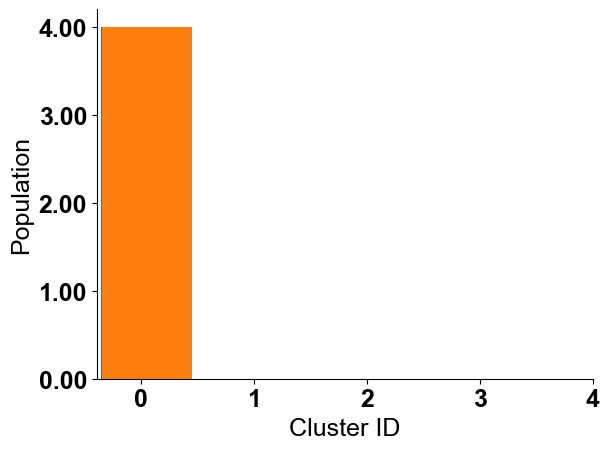

In [125]:
#To demonstrate convergence, plot the populationsof top five clusters for a03ws alone and a03ws + 10074-a03ws_cs with error bars from first and second halves of the simulations
#Select top five clusters for a03ws alone and a03ws + 10074-a03ws_cs
clus= [0, 1, 2, 3, 4, 8, 14, 15, 19]

#Plot clusters with populations and errors
fig = plt.figure()
ax = plt.subplot(111)
x=np.arange(0, 9, 1)
ax.bar(x-0.15, cluster_pop_a03ws_cut[clus].flatten(), yerr=np.asarray(a03ws_err)[clus], ecolor=e_a03ws, color=c_a03ws, alpha=0.5, align='center', width=0.25, error_kw=dict(lw=1, capsize=2, capthick=1))
ax.bar(x+0.15, cluster_pop_a03ws_cs_cut[clus].flatten(), yerr=np.asarray(a03ws_cs_err)[clus], ecolor=e_a03ws_cs, color=d_a03ws, alpha=0.5, align='center', width=0.25, error_kw=dict(lw=1, capsize=2, capthick=1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.arange(0, 9, 1), clus)
ax.set_ylabel("Population")
ax.set_xlabel("Cluster ID")
#plt.savefig('barpops.pdf', format='pdf', dpi=1000, transparent=True)

In [74]:
np.shape(cluster_pop_a03ws_cut)

(15787, 1)

In [110]:
traj_sort_cut[:40000]


array([ 442, 1891,  442, ..., 3680,    0,    0])

In [111]:
# how to reality check 

np.where(traj_sort_cut[:40000]==1)[0].shape[0]/40000

0.04625

In [75]:
np.shape(cluster_pop_a03ws_cs_cut)

(15787, 1)

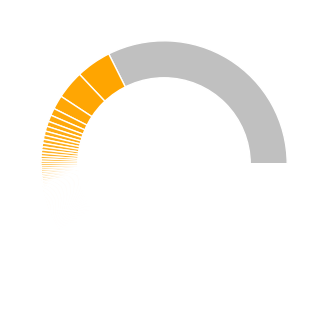

In [76]:
#To visualise the number of clusters and corresponding populations, make a "ring plot" for a03ws alone
#Execute twice to get size correct

#Create a circle for the center of the plot
my_circle=plt.Circle( (0, 0), 0.7, color='white')
a03ws_pops = cluster_pop_a03ws_cut.flatten()
size=np.sort(a03ws_pops)[::-1]

#Start first color as silver for shared cluster (Cluster ID:0)
color_list = ['silver']

#Then add more colors making them gradually get lighter
for i in range(0, len(size)):
    color_list.append(cmap_a03ws_circ(i/(80)))

#Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.pie(size, colors=color_list, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
ax.add_artist(my_circle)
#ax.set_title("a03ws");

#plt.show()
#plt.savefig('/home/alice/Data/orf6/MD/MD_figures/2023/clustering/a03ws_cut2.5.pdf', format='pdf', dpi=1000, transparent=True)

In [77]:
a03ws_pops[3]

0.018200000000000265

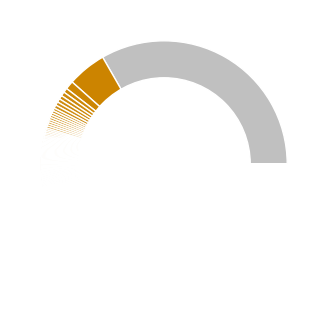

In [78]:
#To visualise the number of clusters and corresponding populations, make a "ring plot" for a03ws_cs
#Execute twice to get size correct

#Create a circle for the center of the plot
my_circle=plt.Circle( (0, 0), 0.7, color='white')
a03ws_cs_pops = cluster_pop_a03ws_cs_cut.flatten()
size=np.sort(a03ws_cs_pops)[::-1]

#Start first color as silver for shared cluster (Cluster ID:0)
color_list = ['silver']

#Then add more colors making them gradually get lighter
for i in range(0, len(size)):
    color_list.append(cmap_a03ws_cs_circ(i/(80)))
    
#Plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.pie(size, colors=color_list, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
ax.add_artist(my_circle)
#ax.set_title("a03ws with CS restraints");

#plt.savefig('/home/alice/Data/orf6/MD/MD_figures/2023/clustering/a03ws_cs_cut2.5.pdf', format='pdf', dpi=1000, transparent=True)

In [38]:
# indexing to see if clusters are the same 

cluster_pop_a03ws_cut[1]

array([0.04625])

In [ ]:
cluster_pop_a03ws_cut[1]

Now, we want to generate representative PDB files for the top five clusters in each simulation. To do this, we will select conformations in a weighted way, based on their proximity to the cluster center. Trajectories containing only 'topframes' were generated using slice in mdtraj. Note the periodic boundary conditions have been corrected in these trajectories. Conformations were aligned using MatchMaker in Chimera. Residue groups (hydrophobic, hydrophilic, charged, and polar) were selected using defaults in Chimera.

In [25]:
t_a03ws = md.load('a03ws/traj_all-skip-2-noW-whole.trr', top='a03ws/frame0.pdb')
t_a03ws_cs = md.load('a03ws_cs/traj_all-skip-4-noW-whole.trr', top='a03ws_cs/frame0.pdb')

In [26]:
## need to save top frames

#topframes_a03ws = t_a03ws.slice((top_frames_a03ws))

#t_a03ws[top_frames_a03ws].save('topframes_a03ws.trr')

In [27]:
## need to save top frames

topframes_a03ws_cs = t_a03ws_cs.slice((top_frames_a03ws_cs))

t_a03ws_cs[top_frames_a03ws_cs].save('topframes_a03ws_cs.trr')

In [28]:
pwd

'/mnt/raid1/Alice/orf6/MD/analysis'

In [152]:
#Load in trajectories of top frames with corrected periodic boundary conditions
top = md.load('a03ws/topframes_a03ws.trr', top='a03ws/frame0.pdb')

#Break up traj (with cluster IDs from above) into AB and G5
sort_clus_a03ws = traj_sort_cut[:40000] 
sort_clus_a03ws_cs = traj_sort_cut[40000:]

#Load in cluster centers, then assign each frame to 1 cluster
log = pd.read_csv('a03ws/gromos_clustering_LJ/gromos/CUT_2/log.dat', delim_whitespace=True, header=None)
log_centers = log[5].values   #get list of cluster ID's in shuffled order

#Get true cluster centers
clus_center_sort_cut = indices.argsort()[log_centers]

#Get LJ contact maps for cluster centers
clus_center_LJ = LJall_a03ws_a03ws_cs_cut[clus_center_sort_cut] 

In [165]:
#FOR a03ws alone
#Set cluster id
c=9 # The ones used in the manuscript are IDs = [0, 1, 2, 3, 4]

#Calculate root-mean-square deviation (RMSD) between each frame and cluster center
rmsd_list = np.sqrt(((LJ_a03ws_cut - clus_center_LJ[c]) ** 2).mean(axis=1))
    
#Generate weights based on RMSD. The smaller the RMSD, the more likely the frame will included.     
rmsd_weights = np.zeros_like(rmsd_list)
for i in range(0, len(rmsd_list)):
    if sort_clus_a03ws[i] == c:
        if rmsd_list[i]==0:
            weight = 10000000 #set this weight very high as we want to be sure that the cluster center is included
        else:
            weight = 1/rmsd_list[i]
    else:
        weight = 0
    rmsd_weights[i] = weight

rmsd_weights /= rmsd_weights.sum()

#Pick structures randomly based on weights
structs = np.random.choice(range(0, 40000), 10, p = rmsd_weights, replace=False)

clus_a03ws = top.slice(structs)
clus_a03ws.save_pdb('a03ws/gromos_clustering_LJ/gromos/CUT_2/pdb_files/cluster_{0}_a03ws.pdb'.format(c))

In [168]:
#Load in trajectories of top frames with corrected periodic boundary conditions
top = md.load('a03ws_cs/topframes_a03ws_cs.trr', top='a03ws_cs/frame0.pdb')

#Break up traj (with cluster IDs from above) into AB and G5
sort_clus_a03ws_cs = traj_sort_cut[:40000] 
sort_clus_a03ws_cs_cs = traj_sort_cut[40000:]

#Load in cluster centers, then assign each frame to 1 cluster
log = pd.read_csv('a03ws/gromos_clustering_LJ/gromos/CUT_2/log.dat', delim_whitespace=True, header=None)
log_centers = log[5].values   #get list of cluster ID's in shuffled order

#Get true cluster centers
clus_center_sort_cut = indices.argsort()[log_centers]

#Get LJ contact maps for cluster centers
clus_center_LJ = LJall_a03ws_a03ws_cs_cut[clus_center_sort_cut] 

In [180]:
#FOR a03ws_cs alone
#Set cluster id
c=9 # The ones used in the manuscript are IDs = [0, 1, 2, 3, 4]

#Calculate root-mean-square deviation (RMSD) between each frame and cluster center
rmsd_list = np.sqrt(((LJ_a03ws_cs_cut - clus_center_LJ[c]) ** 2).mean(axis=1))
    
#Generate weights based on RMSD. The smaller the RMSD, the more likely the frame will included.     
rmsd_weights = np.zeros_like(rmsd_list)
for i in range(0, len(rmsd_list)):
    if sort_clus_a03ws_cs[i] == c:
        if rmsd_list[i]==0:
            weight = 10000000 #set this weight very high as we want to be sure that the cluster center is included
        else:
            weight = 1/rmsd_list[i]
    else:
        weight = 0
    rmsd_weights[i] = weight

rmsd_weights /= rmsd_weights.sum()

#Pick structures randomly based on weights
structs = np.random.choice(range(0, 40000), 10, p = rmsd_weights, replace=False)

clus_a03ws_cs = top.slice(structs)
clus_a03ws_cs.save_pdb('a03ws/gromos_clustering_LJ/gromos/CUT_2/pdb_files/cluster_{0}_a03ws_cs.pdb'.format(c))

In [ ]:
## Make contact maps for each cluster 